### Importing necessary libraries

In [ ]:
import os
import pandas as pd
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [ ]:
%matplotlib inline

In [ ]:
yf.pdr_override()

### Setting IEX_API_KEY Env. variable

In [ ]:
os.environ["IEX_API_KEY"] = "pk_3d9d9d1ef0fa4d468ed40272baf652ab"

In [ ]:
start_date = '2017-04-22'
end_date = '2018-04-22'

## Importing data using pandas_datareader

First you need to import data from <b>pandas_datareader</b> module. Here <b>data.get_data_yahoo</b> function is used to return the historical price of a stock's ticker, over a specifc time range.  

In [ ]:
# Note: Yahoo recently has become an unstable data source.
# collect data for Google from 2017-04-22 to 2018-04-22
df = pdr.get_data_yahoo('GOOG', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 downloaded


In [ ]:
df.head(n=6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-24,851.200012,863.450012,849.859985,862.760010,862.760010,1372500
2017-04-25,865.000000,875.000000,862.809998,872.299988,872.299988,1672000
2017-04-26,874.229980,876.049988,867.747986,871.729980,871.729980,1237200
2017-04-27,873.599976,875.400024,870.380005,874.250000,874.250000,2026800
2017-04-28,910.659973,916.849976,905.770020,905.960022,905.960022,3276300
2017-05-01,901.940002,915.679993,901.450012,912.570007,912.570007,2116000


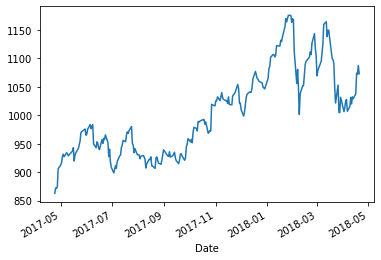

In [ ]:
df['Adj Close'].plot()
plt.show()

## Importing data from IEX using API

In [ ]:
# collect data for Amazon from 2017-04-22 to 2018-04-22
df1 = pdr.DataReader(name='AMZN', data_source='iex', start=start_date, end=end_date)

In [ ]:
df1.head(n=6)

,date,open,high,low,close,volume
0,2017-04-24,908.68,909.990,903.8200,907.41,3122893
1,2017-04-25,907.04,909.480,903.0000,907.62,3380639
2,2017-04-26,910.30,915.749,907.5600,909.29,2608948
3,2017-04-27,914.39,921.860,912.1100,918.38,5305543
4,2017-04-28,948.83,949.590,924.3335,924.99,7364681
5,2017-05-01,927.80,954.400,927.8000,948.23,5466544


In [ ]:
symbol = 'AMZN'
df1.to_csv("{}.csv".format(symbol))

### Visualizing collected OHLCV Data of 'AMZN'

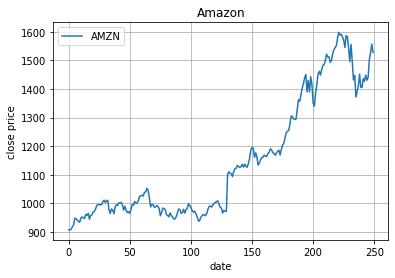

In [ ]:
# select only close column
close = df1[['close']]
# rename the column with symbole name
close = close.rename(columns={'close': symbol})
ax = close.plot(title='Amazon')
ax.set_xlabel('date')
ax.set_ylabel('close price')
ax.grid()
plt.show()

## Importing data from Yahoo finance

To fetch data from Yahoo finance, you need to first pip install yfinance. The 'pip' command is a tool for installing and managing Python packages.

In [ ]:
!pip install yfinance

###You can fetch data from Yahoo finance using download method.

In [ ]:
import yfinance as yf
df2 = yf.download('AAPL', start=start_date, end=end_date)
df2.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-24,35.875000,35.987499,35.794998,35.910000,34.048462,68537200
2017-04-25,35.977501,36.224998,35.967499,36.132500,34.259430,75486000
2017-04-26,36.117500,36.150002,35.845001,35.919998,34.057938,80164800
2017-04-27,35.980000,36.040001,35.827499,35.947498,34.084007,56985200
2017-04-28,36.022499,36.075001,35.817501,35.912498,34.050831,83441600


## Importing data from Quandl

To fetch data from Quandl, first import quandl. Here, <b>quandl.get</b> function is used to fetch data for a security over a specific time period.

In [ ]:
!pip3 install quandl

In [ ]:
import quandl
from datetime import datetime

# quantrautil is a module specific to Quantra to fetch stock data
# from quantrautil import get_quantinsti_api_key
api_key = 'ABiZHARd3wJ6r7xtnWD2'

df3 = quandl.get('EOD/AAPL', start_date=start_date,
                  end_date=end_date, api_key=api_key)

# Note that you need to know the "Quandl code" of each dataset you download. In the above example, it is 'EOD/AAPL'.
# To get your personal API key, sign up for a free Quandl account. Then, you can find your API key on Quandl account settings page.

df3.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-04-24,143.5000,143.95,143.1800,143.64,17116599.0,0.0,1.0,34.010204,34.116857,33.934363,34.043385,68466396.0
2017-04-25,143.9100,144.90,143.8700,144.53,18871501.0,0.0,1.0,34.107376,34.342011,34.097896,34.254319,75486004.0
2017-04-26,144.4700,144.60,143.3762,143.68,20041241.0,0.0,1.0,34.240099,34.270910,33.980863,34.052865,80164964.0
2017-04-27,143.9225,144.16,143.3100,143.79,14246347.0,0.0,1.0,34.110339,34.166628,33.965174,34.078936,56985388.0
2017-04-28,144.0900,144.30,143.2700,143.65,20860358.0,0.0,1.0,34.150037,34.199808,33.955693,34.045755,83441432.0


In [ ]:
ticker = 'AMZN' # same as symbol

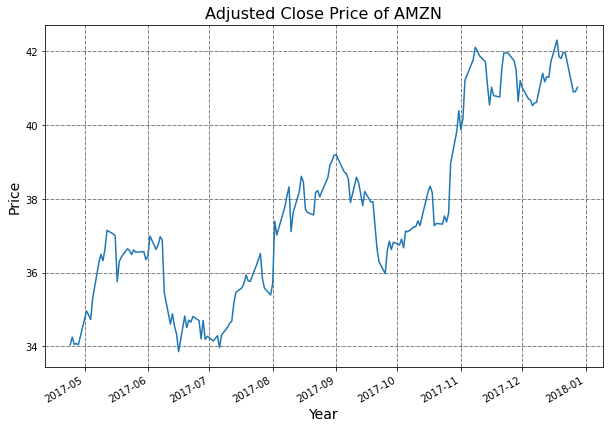

In [ ]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))
# Plot the adjusted close price
df3['Adj_Close'].plot()
# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Get stock market data for multiple tickers

#### To get the stock market data of multiple stock tickers, you can create a list of tickers and call the quandl get method for each stock ticker.

In [ ]:
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']
df4 = pd.DataFrame(columns=tickers_list)
# Fetch the data
for ticker in tickers_list:
 df4[ticker] = quandl.get('WIKI/' + ticker, start_date=start_date,
 end_date=end_date, api_key=api_key)['Adj. Close']
# Print first 5 rows of the data
df4.head()

,AAPL,IBM,MSFT,WMT
Date,,,,
2017-04-24,142.476496,155.970305,66.460508,73.824703
2017-04-25,143.369205,155.621009,66.844332,74.091254
2017-04-26,142.487208,155.300821,66.755757,74.466400
2017-04-27,142.625281,155.553091,67.188789,74.476272
2017-04-28,142.486415,155.523983,67.375780,74.219593


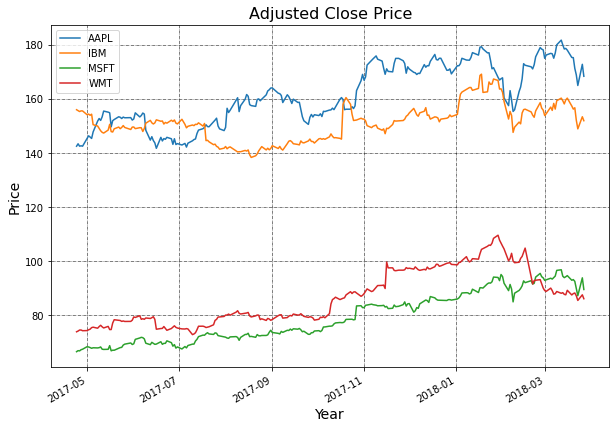

In [ ]:
# Plot all the close prices
df4.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Plotting candlesticks interactive graph for data frame 2 (df2)

In [ ]:
# Importing the necessary packages
from bokeh.plotting import figure, show, output_file

In [ ]:
# Indexing
w = 12*60*60*1000  # half day in ms
df2.index = pd.to_datetime(df2.index)

In [ ]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-24,35.875000,35.987499,35.794998,35.910000,34.048462,68537200
2017-04-25,35.977501,36.224998,35.967499,36.132500,34.259430,75486000
2017-04-26,36.117500,36.150002,35.845001,35.919998,34.057938,80164800
2017-04-27,35.980000,36.040001,35.827499,35.947498,34.084007,56985200
2017-04-28,36.022499,36.075001,35.817501,35.912498,34.050831,83441600


### Remember:

1. If the opening price is less than the closing price then a green candlestick is to be created to represent the day. 
2. If the opening price is greater than the closing price then a red candlestick is to be created to represent the day.
1. We will use 'inc' and 'dec' as the variable to capture these two patterns in the code.

In [ ]:
inc = df.Close > df.Open
dec = df.Open > df.Close

In [ ]:
# The various 'interactions' we want in our candlestick graph. This is an argument to be passed in figure () from bokeh.plotting
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

# Pan: It helps you pan/move the plot

# Wheel Zoom: You can zoom in using the wheel of your mouse

# Box Zoom: You can zoom in by creating a box on the specific area of the plot. Use the mouse, click and drag to create the box

# Reset: If you want to reset the visualisation of the plot

# Save: Saving the plot (entire or the part which you want) as an image file

In [ ]:
# Passing the arguments of our bokeh plot
p = figure(x_axis_type="datetime", tools=TOOLS,
           plot_width=1000, title="SPY Candlestick")

In [ ]:
from math import pi

# The orientation of major tick labels can be controlled with the major_label_orientation property.
# This property accepts the values "horizontal" or "vertical" or a floating point number that gives
# the angle (in radians) to rotate from the horizontal.
p.xaxis.major_label_orientation = pi/4

In [ ]:
# Alpha signifies the floating point between 0 (transparent) and 1 (opaque).
# The line specifies the alpha for the grid lines in the plot.
p.grid.grid_line_alpha = 0.3

In [ ]:
# Configure and add segment glyphs to the figure
p.segment(df2.index, df2.High, df2.index, df2.Low, color="red")

GlyphRenderer(id='1036', ...)

In [ ]:
# Adds vbar glyphs to the Figure
p.vbar(df.index[inc], w, df.Open[inc], df.Close[inc],
       fill_color="#1ED837", line_color="black")
p.vbar(df.index[dec], w, df.Open[dec], df.Close[dec],
       fill_color="#F2583E", line_color="black")

GlyphRenderer(id='1048', ...)

In [ ]:
# Generates simple standalone HTML documents for Bokeh visualization
output_file("candlestick.html", title="candlestick.py example")

In [ ]:
# The graph will open in another tab of the browser

show(p)

# The code ends here

In [ ]:
from IPython.display import HTML
HTML("./candlestick.html")